## CNN Classification

### 1) Simple CNN for mapping input to output using sklearn's MNIST digits dataset (classification problem)

In [389]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [390]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [391]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

In [392]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [393]:
class SimpleCNN(nn.Module):
    def __init__(self, *args, **kwargs):
        super(SimpleCNN, self).__init__(*args, **kwargs)
        self.conv1 = nn.Conv2d(1,32,kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128,10)
        self.pool = nn.MaxPool2d(2,2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        x = torch.relu(x)
        # print("Output Shape after Linear Layer ", x.shape)
        x = self.fc2(x)
        return x
    
model = SimpleCNN()
print("Keys for state dict", model.state_dict().keys())
print()
print("Model Details:", model)


Keys for state dict odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

Model Details: SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [394]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [395]:
epochs = 7

for epoch in range(epochs):
    model.train()
    runningLoss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        loss.backward()
        optimizer.step()

        runningLoss += loss.item()
        _, predicted = torch.max(y_pred, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/epochs], Loss : ({runningLoss / len(train_dataloader):.4f}) , Accuracy : ({100 * correct / total:.2f})%")

    

Epoch [1/epochs], Loss : (0.1652) , Accuracy : (95.07)%
Epoch [2/epochs], Loss : (0.0453) , Accuracy : (98.59)%
Epoch [3/epochs], Loss : (0.0301) , Accuracy : (99.05)%
Epoch [4/epochs], Loss : (0.0237) , Accuracy : (99.21)%
Epoch [5/epochs], Loss : (0.0191) , Accuracy : (99.41)%
Epoch [6/epochs], Loss : (0.0135) , Accuracy : (99.57)%
Epoch [7/epochs], Loss : (0.0110) , Accuracy : (99.65)%


In [396]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_dataloader:
        y_pred = model(inputs)
        _, predicted = torch.max(y_pred, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy : {100 * correct / total:.2f}%")

Test Accuracy : 98.94%


In [397]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(img.numpy().squeeze(), cmap="gray")
    plt.show()

In [398]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
y_pred = model(images)
_, predicted = torch.max(y_pred, 1)


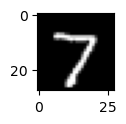

Predicted : 7, True Label : 7


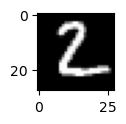

Predicted : 2, True Label : 2


In [399]:
for i in range(2):
    plt.figure(figsize=(1,1))
    imshow(images[i])
    print(f"Predicted : {predicted[i].item()}, True Label : {labels[i].item()}")